In [72]:
import pandas as pd 
import numpy as np

In [73]:
data = pd.read_csv("heart_disease_uci.csv")

In [74]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [75]:
# One-hot encode the 'dataset' and 'cp' columns
data = pd.get_dummies(data, columns=['dataset', 'cp', 'restecg'])
data.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,1,63,Male,145.0,233.0,True,150.0,False,2.3,downsloping,0.0,fixed defect,0,True,False,False,False,False,False,False,True,True,False,False
1,2,67,Male,160.0,286.0,False,108.0,True,1.5,flat,3.0,normal,2,True,False,False,False,True,False,False,False,True,False,False
2,3,67,Male,120.0,229.0,False,129.0,True,2.6,flat,2.0,reversable defect,1,True,False,False,False,True,False,False,False,True,False,False
3,4,37,Male,130.0,250.0,False,187.0,False,3.5,downsloping,0.0,normal,0,True,False,False,False,False,False,True,False,False,True,False
4,5,41,Female,130.0,204.0,False,172.0,False,1.4,upsloping,0.0,normal,0,True,False,False,False,False,True,False,False,True,False,False


In [76]:
# Perform mean imputation for the columns 'trestbps', 'chol', and 'fbs'
data['trestbps'].fillna(data['trestbps'].mean(), inplace=True)
data['chol'].fillna(data['chol'].mean(), inplace=True)

# Calculate the mode of the 'fbs' column
fbs_mode = data['fbs'].mode()[0]

# Impute missing values with the mode
data['fbs'].fillna(fbs_mode, inplace=True)




/var/folders/6l/_j3ymxdx3bndlj9z22_9d6000000gp/T/ipykernel_43509/3972256662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trestbps'].fillna(data['trestbps'].mean(), inplace=True)
/var/folders/6l/_j3ymxdx3bndlj9z22_9d6000000gp/T/ipykernel_43509/3972256662.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [77]:
# Check for missing values in the columns after imputation
print("Missing values in 'trestbps':", data['trestbps'].isnull().sum())
print("Missing values in 'chol':", data['chol'].isnull().sum())
print("Missing values in 'fbs':", data['fbs'].isnull().sum())


Missing values in 'trestbps': 0
Missing values in 'chol': 0
Missing values in 'fbs': 0


Column: age
Number of outliers: 0
Outliers:
[]
-----------------------------------------------------
Column: trestbps
Number of outliers: 28
Outliers:
[172. 180. 200. 174. 178. 192. 180. 178. 180. 190. 180. 180. 180. 180.
 200. 180. 180.  80. 180. 200. 185. 200. 180.   0. 178. 172. 180. 190.]
-----------------------------------------------------
Column: chol
Number of outliers: 185
Outliers:
[417. 407. 564. 409. 412. 468. 466. 529. 603. 404. 518. 491.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  

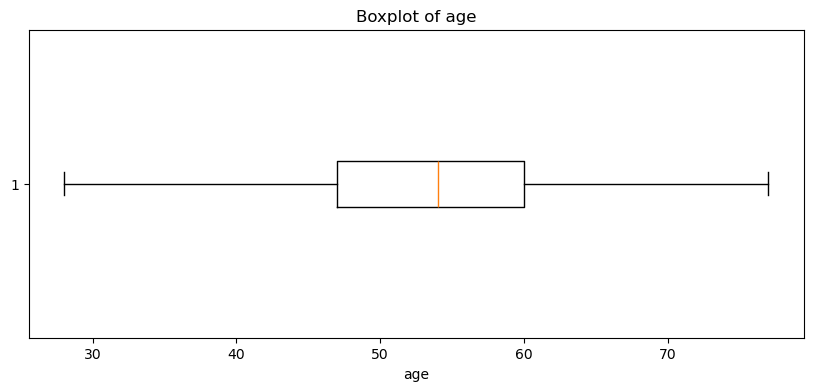

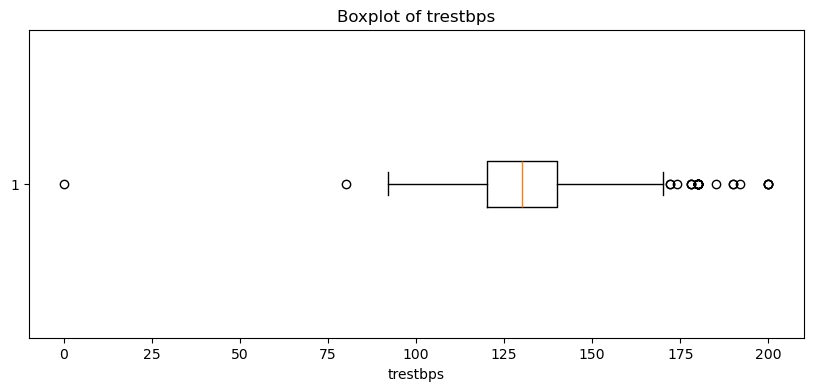

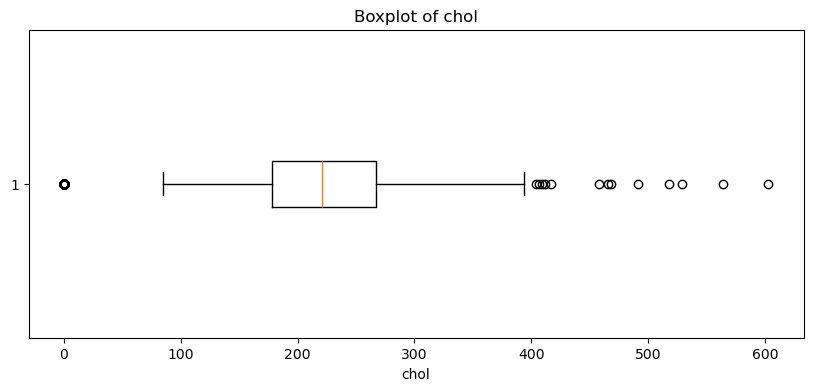

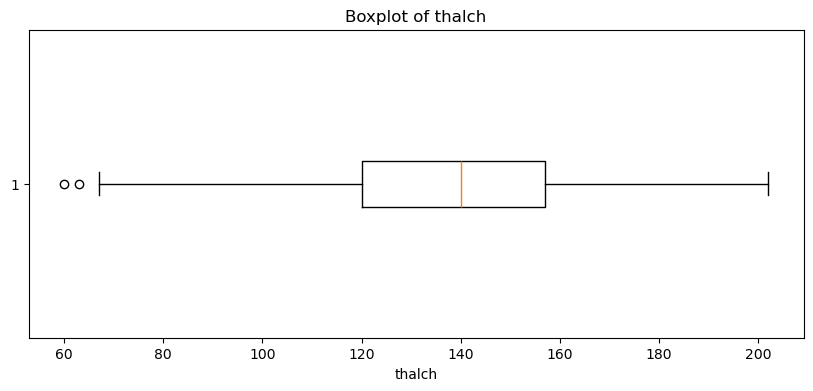

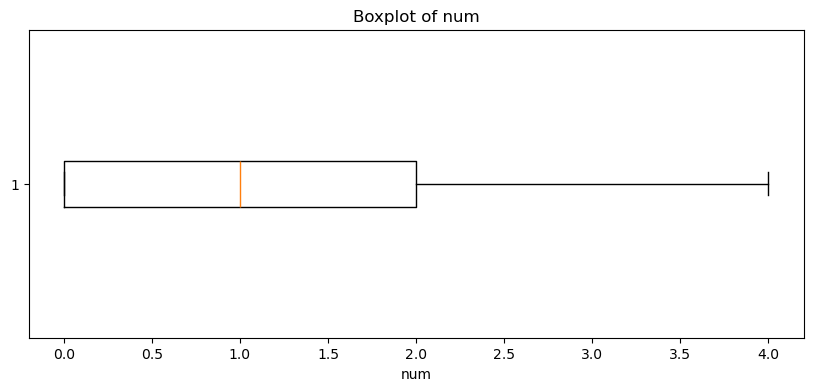

In [78]:
import matplotlib.pyplot as plt

# List of columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'num']

# Use descriptive statistics (IQR) to identify potential outliers
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Print outliers information
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outliers:\n{outliers[column].values}")
    print("-----------------------------------------------------")

# Visualize the data using boxplots for continuous columns
for column in columns_to_check:
    plt.figure(figsize=(10, 4))
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


In [79]:
data.dtypes

id                            int64
age                           int64
sex                          object
trestbps                    float64
chol                        float64
fbs                            bool
thalch                      float64
exang                        object
oldpeak                     float64
slope                        object
ca                          float64
thal                         object
num                           int64
dataset_Cleveland              bool
dataset_Hungary                bool
dataset_Switzerland            bool
dataset_VA Long Beach          bool
cp_asymptomatic                bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_lv hypertrophy         bool
restecg_normal                 bool
restecg_st-t abnormality       bool
dtype: object

In [88]:


# List of boolean columns to convert to numerical binary
boolean_columns = [
    'fbs',
    'dataset_Cleveland', 
    'dataset_Hungary', 
    'dataset_Switzerland', 
    'dataset_VA Long Beach',
    'cp_asymptomatic', 
    'cp_atypical angina', 
    'cp_non-anginal', 
    'cp_typical angina',
    'restecg_lv hypertrophy',        
    'restecg_normal',
    'restecg_st-t abnormality'
    
]

# Convert the boolean columns to numerical (0 and 1)
data[boolean_columns] = data[boolean_columns].astype(int)

#Check 
data.dtypes


id                            int64
age                           int64
sex                          object
trestbps                    float64
chol                        float64
fbs                           int64
thalch                      float64
exang                        object
oldpeak                     float64
slope                        object
ca                          float64
thal                         object
num                           int64
dataset_Cleveland             int64
dataset_Hungary               int64
dataset_Switzerland           int64
dataset_VA Long Beach         int64
cp_asymptomatic               int64
cp_atypical angina            int64
cp_non-anginal                int64
cp_typical angina             int64
restecg_lv hypertrophy        int64
restecg_normal                int64
restecg_st-t abnormality      int64
dtype: object

In [90]:


# Convert 'sex' column to numeric: Female -> 0, Male -> 1
data['sex'] = data['sex'].map({'Female': 0, 'Male': 1})


In [96]:


# Remove the 'slope', 'exang', and 'thal' columns from the dataset
data = data.drop(columns=['slope', 'exang', 'thal', 'oldpeak', 'ca'])



In [100]:
data.shape

(920, 19)

In [106]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

X = data.drop(columns=['id', 'num'])  # Predictors (all columns except 'id' and 'num')
y = data['num']  # Outcome variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
xgboost_regressor = xgb.XGBRegressor(
    max_depth=4,           # Limits the maximum depth of a tree (prevents overfitting)
    learning_rate=0.1,     # Step size shrinkage used in updates to prevent overfitting
    n_estimators=100,      # Number of trees (more trees can increase accuracy but risk overfitting)
    subsample=0.8,         # Subsample ratio of the training instance to prevent overfitting
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    reg_alpha=0.01,        # L1 regularization term on weights (Lasso regression)
    reg_lambda=1,          # L2 regularization term on weights (Ridge regression)
    random_state=42        # Random state for reproducibility
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.7 MB/s eta 0:00:00 0:00:01


In [110]:
# Set up the initial XGBoost regressor

from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
xgboost_regressor = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6],              # Different depths of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Different learning rates
    'n_estimators': [50, 100, 150, 200],     # Different numbers of trees

}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgboost_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric for regression
    cv=5,                              # 5-fold cross-validation
    verbose=1,                         # Output progress
    n_jobs=-1                          # Use all available cores
)


In [112]:
# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [114]:
#Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [116]:
#Evaluate the best model on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [118]:

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

Training MSE: 0.7160, R2: 0.4508
Testing MSE: 0.7621, R2: 0.4131


In [122]:
# Classification task

# Recode the 'num' column: 0 stays as 0, 1, 2, 3, 4 are recoded to 1
data['num'] = data['num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

data['num'].value_counts()


num
1    509
0    411
Name: count, dtype: int64

In [124]:
# Separate predictors (features) and the outcome variable
X = data.drop(columns=['id', 'num'])  # Use all columns except 'id' and 'num' as predictors
y = data['num']  # Outcome variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
#Set up the initial XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6],              # Different depths of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Different learning rates
    'n_estimators': [50, 100, 150, 200],     # Different numbers of trees
}

In [128]:
#Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgboost_classifier,
    param_grid=param_grid,
    scoring='accuracy',   # Use accuracy as the scoring metric for classification
    cv=5,                 # 5-fold cross-validation
    verbose=1,            # Output progress
    n_jobs=-1             # Use all available cores
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")




Fitting 5 folds for each of 64 candidates, totalling 320 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [136]:
# Evaluate the best model on the training and test sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Detailed evaluation metrics
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.8166
Testing Accuracy: 0.8098

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        75
           1       0.87      0.80      0.83       109

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184


Confusion Matrix (Test Data):
[[62 13]
 [22 87]]


                     Feature  Importance
10           cp_asymptomatic    0.439506
9      dataset_VA Long Beach    0.074283
11        cp_atypical angina    0.074016
1                        sex    0.066510
3                       chol    0.062062
5                     thalch    0.055948
8        dataset_Switzerland    0.049158
7            dataset_Hungary    0.042064
0                        age    0.039677
12            cp_non-anginal    0.029998
13         cp_typical angina    0.026547
16  restecg_st-t abnormality    0.022582
2                   trestbps    0.017649
6          dataset_Cleveland    0.000000
4                        fbs    0.000000
14    restecg_lv hypertrophy    0.000000
15            restecg_normal    0.000000


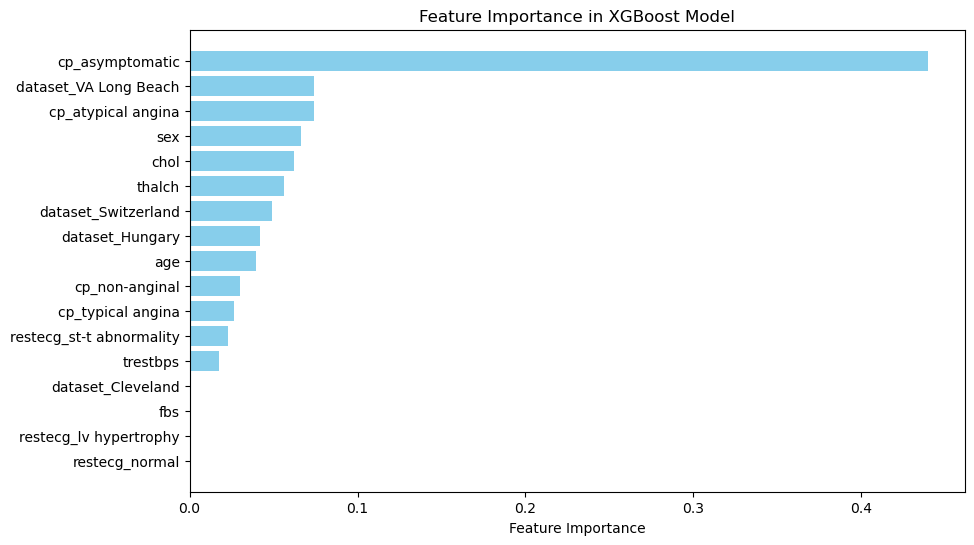

In [138]:
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot the Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()
